In [11]:
%matplotlib inline
import matplotlib.pyplot as plt  # type: ignore
import numpy as np
import numpy.typing as npt

from data.sin import sin_curve, sin_data
from grid.hyperparameters import (ParameterSpace, expand_grid,
                                  full_data_slices, increasing_subslices,
                                  mean_squared_error_metric, plot_metrics,
                                  plot_predictions)
from linear_regression import (GaussianBasisLeastSquaresRegression,
                               PolynomialBasisBayesianLinearRegression,
                               PolynomialBasisLeastSquaresRegression)

In [12]:
s_curve = sin_curve()
s_data = sin_data(n_train=50, n_test=50, noise_stddev=0.3)

In [13]:
%%capture

parameter_spaces = [
    ParameterSpace(
        model=PolynomialBasisBayesianLinearRegression,
        keyword="alpha",
        base_parameters={"m_degrees": 10},
        space=np.linspace(1.0, 100.0, 10),
        base_data=s_data,
        data_slices=full_data_slices(len(s_data.x_train)),
    ),
    ParameterSpace(
        model=PolynomialBasisBayesianLinearRegression,
        keyword="beta",
        base_parameters={"m_degrees": 10},
        space=np.linspace(1.0, 100.0, 10),
        base_data=s_data,
        data_slices=full_data_slices(len(s_data.x_train)),
    ),
    ParameterSpace(
        model=PolynomialBasisBayesianLinearRegression,
        # TODO fix to allow not providing a keyword (in the case that only the data varies)
        keyword="max_evidence_iterations",
        base_parameters={"m_degrees": 10},
        space=[100 for _ in range(10)],
        base_data=s_data,
        data_slices=increasing_subslices(0, 30, 10),
    ),
]

grid = expand_grid(parameter_spaces)

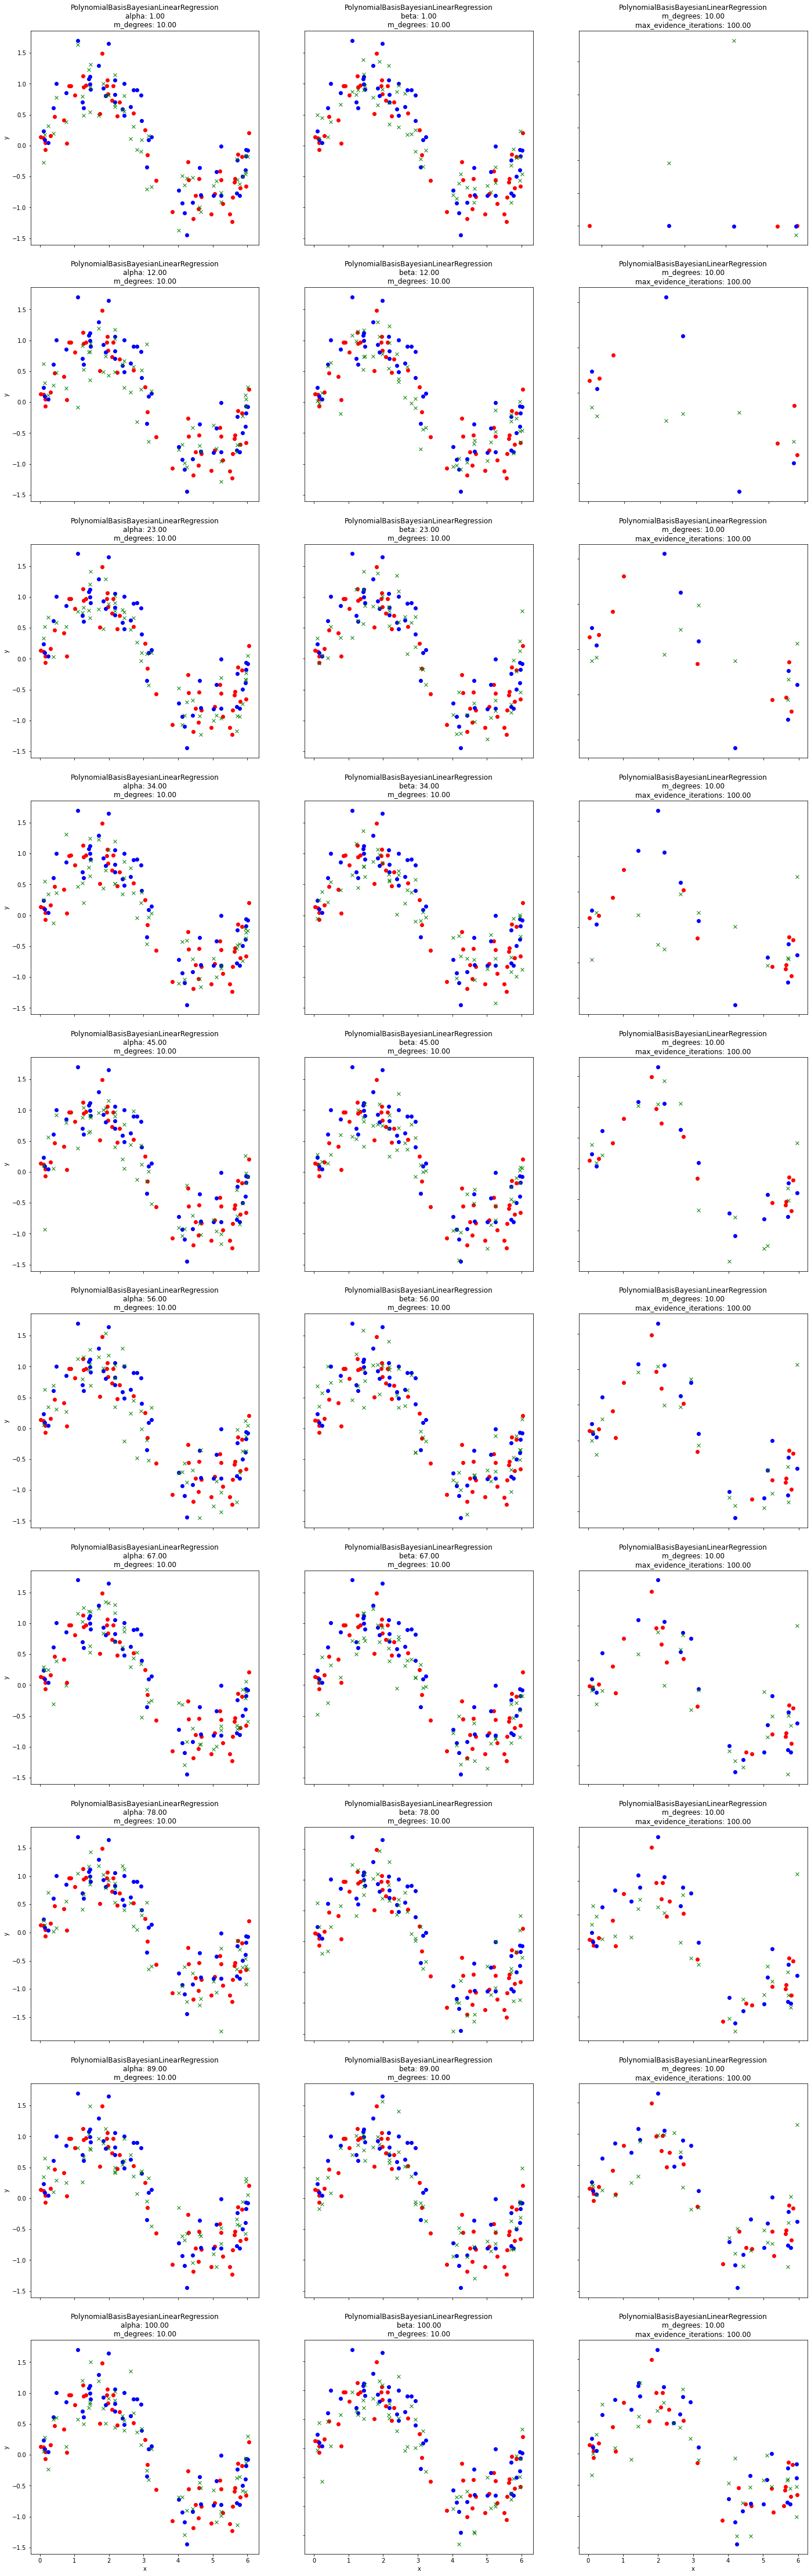

In [14]:
plot_predictions(plt, grid)

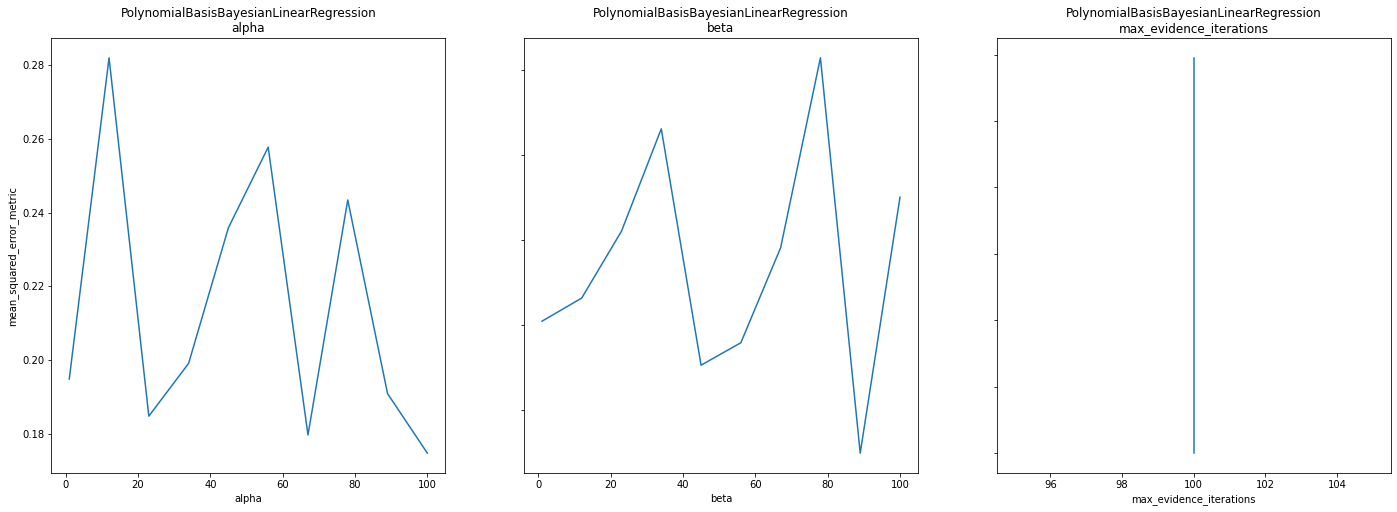

In [15]:
plot_metrics(plt, grid, mean_squared_error_metric)